In [1]:
import sys, os
sys.path.insert(0, '../')
sys.path.insert(0, '../python_src/')

import numpy as np
import scipy as sp
import scipy.io as spio

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib as mpl
import seaborn as sns

import skimage.morphology as morph

import homology

mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set_context('poster', font_scale=1.25)
sns.set(color_codes=True, palette='deep')
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 2.0})

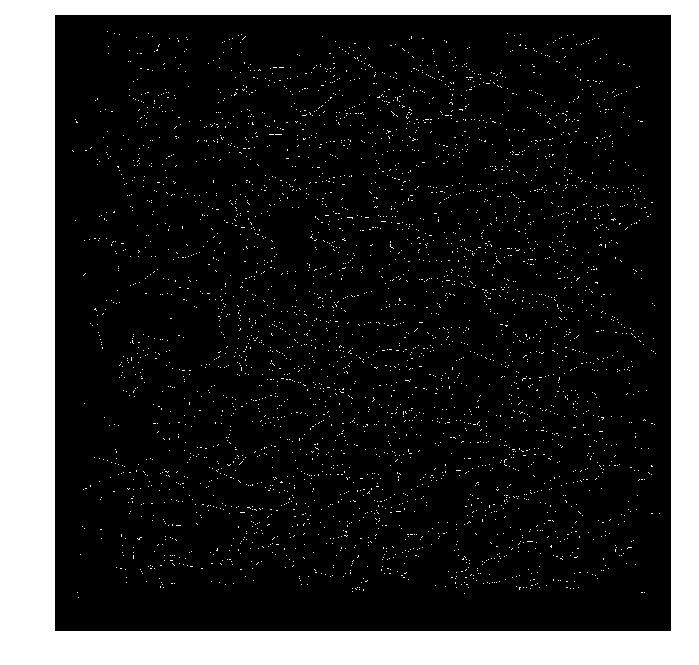

In [2]:
mat = spio.loadmat("../sample_data/Creases17.mat")

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(mat['ridges'], cmap=plt.cm.gray)
ax.axis('off')
plt.show()

In [44]:
print(mat['ridges'].shape)
data = mat['ridges'][500:2500, 500:2500]

Nx = data.shape[0]
Ny = data.shape[1]

print(Nx, Ny)

boundaries = {i+1:[] for i in range(2)}

for i in range(Ny+1):
    for j in range(Nx):
        boundaries[1].append([(Nx+1)*i + j,(Nx+1)*i + j+1])
        
for i in range(Ny):
    for j in range(Nx+1):
        boundaries[1].append([(Nx+1)*i + j,(Nx+1)*(i+1) + j])
        

for i in range(Ny):
    for j in range(Nx):
        boundaries[2].append([Ny*i + j, Ny*(Nx+1) + (Ny+1)*i + j+1, Ny*(i+1) + j, Ny*(Nx+1) + (Ny+1)*i + j])
        

(3000, 3000)
2000 2000


Height: 0
Zeros: 3925447
74553


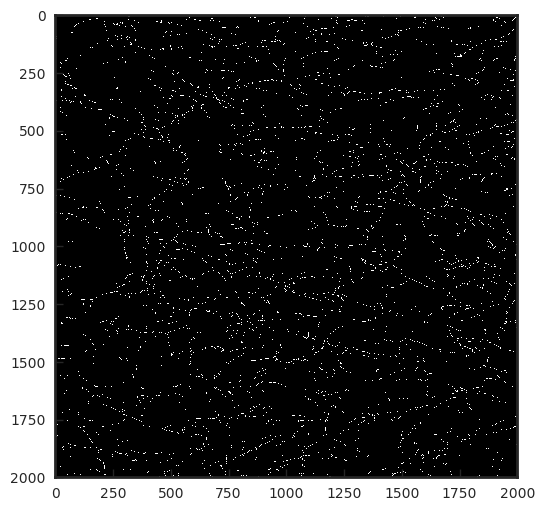

Height: 1
Zeros: 3303833


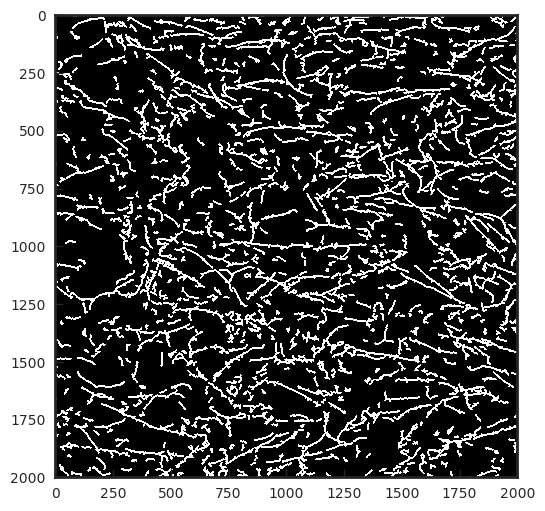

Height: 2
Zeros: 2698925


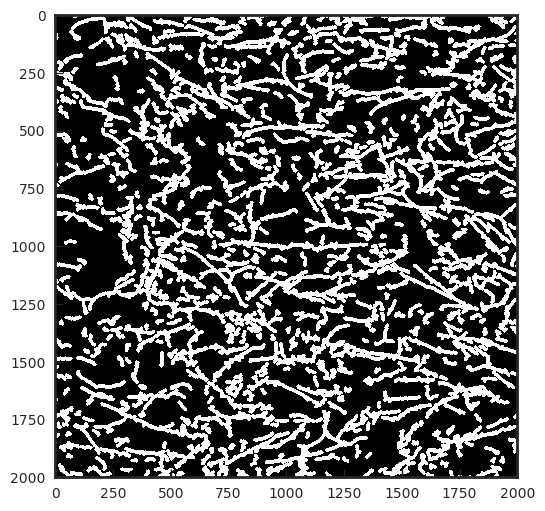

Height: 3
Zeros: 2140350


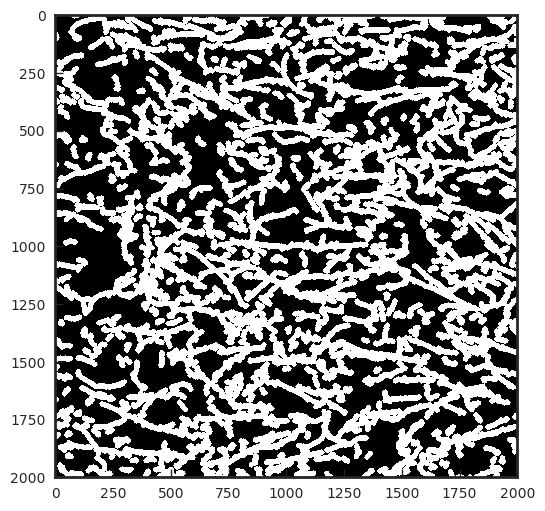

Height: 4
Zeros: 1660614


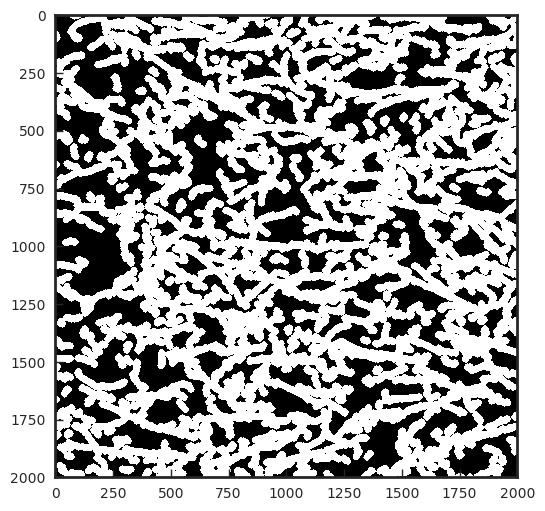

Height: 5
Zeros: 1263358


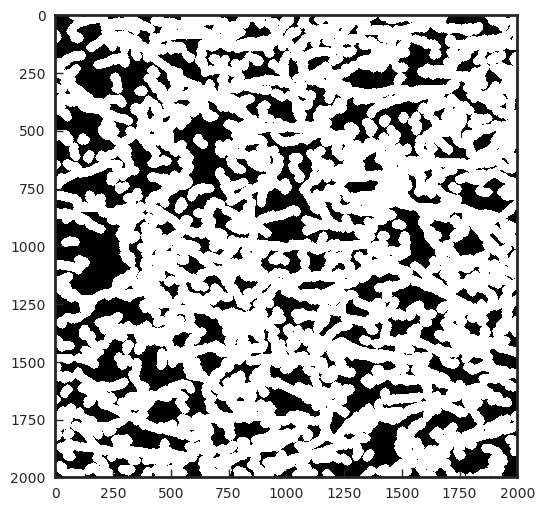

Height: 6
Zeros: 942968


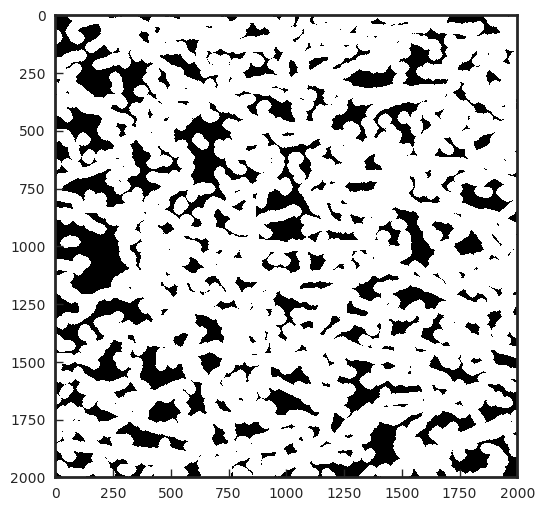

Height: 7
Zeros: 690139


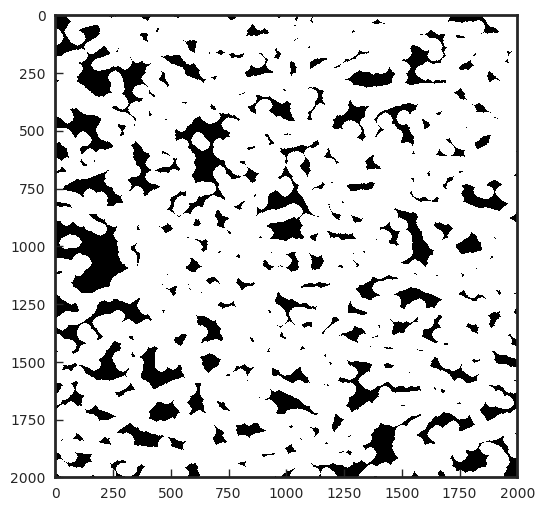

Height: 8
Zeros: 495990


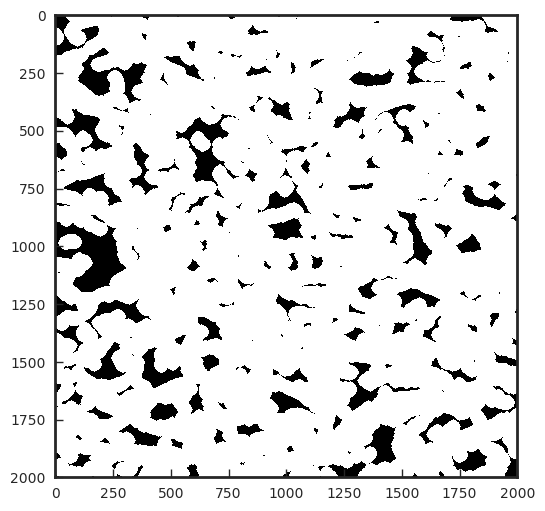

Height: 9
Zeros: 350352


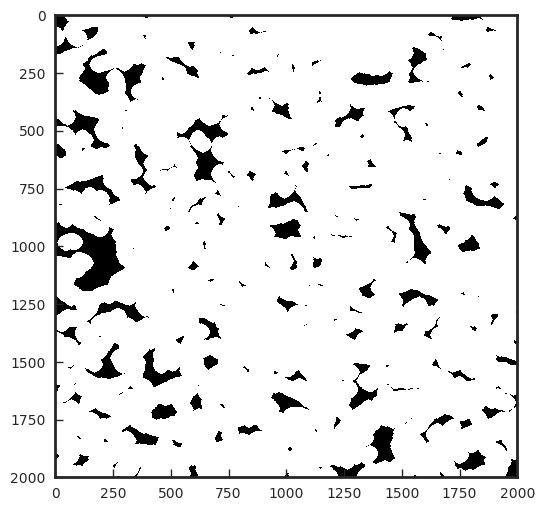

Height: 10
Zeros: 244923


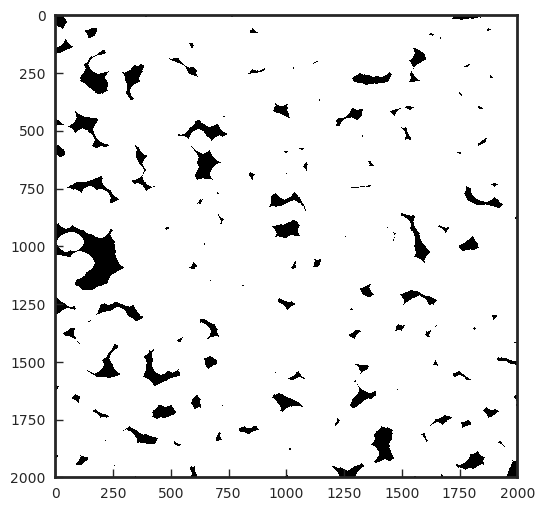

Height: 11
Zeros: 169298


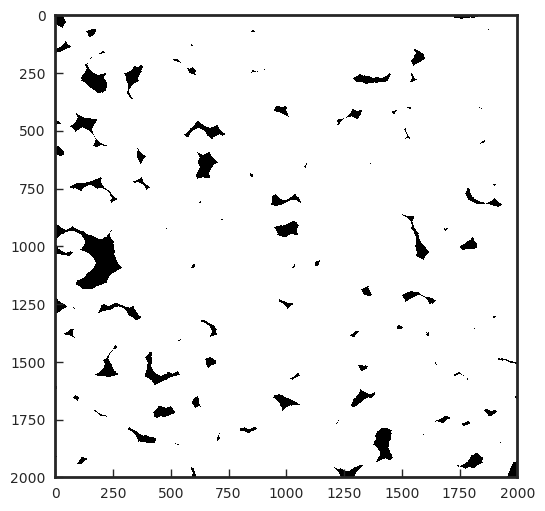

Height: 12
Zeros: 113881


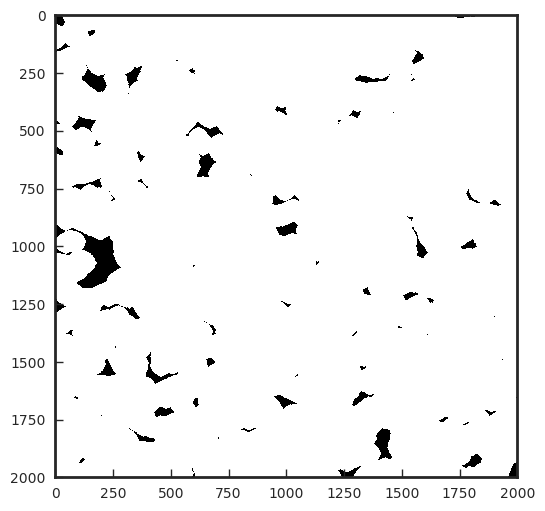

Height: 13
Zeros: 74836


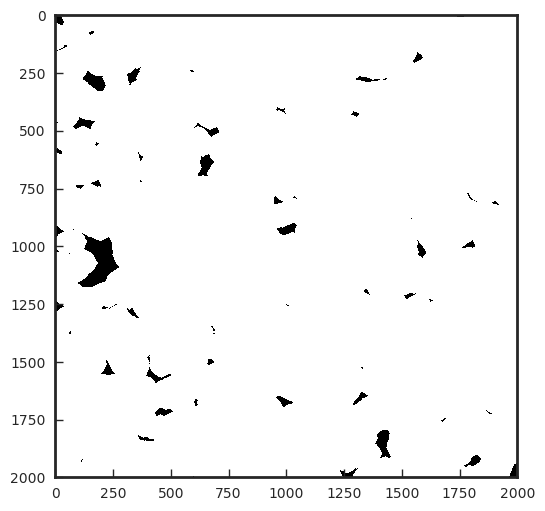

Height: 14
Zeros: 49032


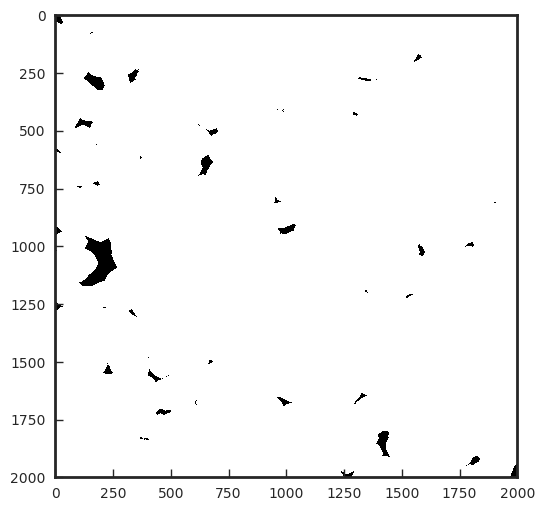

Height: 15
Zeros: 32319


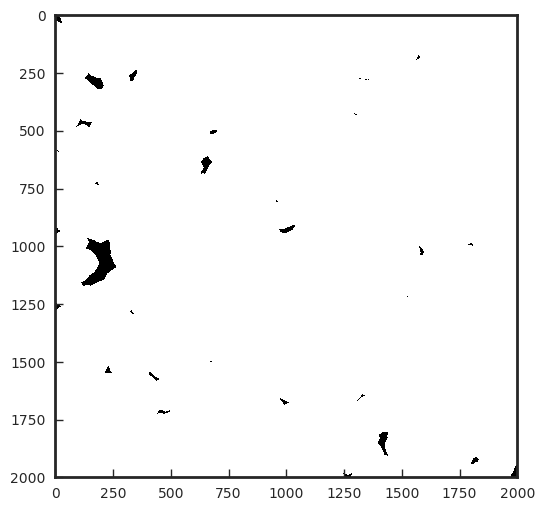

Height: 16
Zeros: 21330


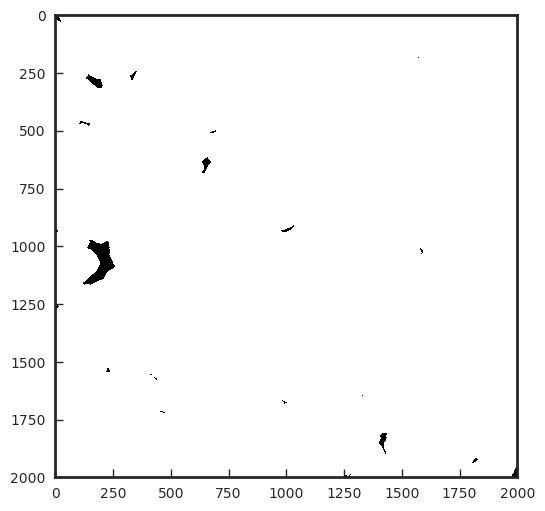

Height: 17
Zeros: 14040


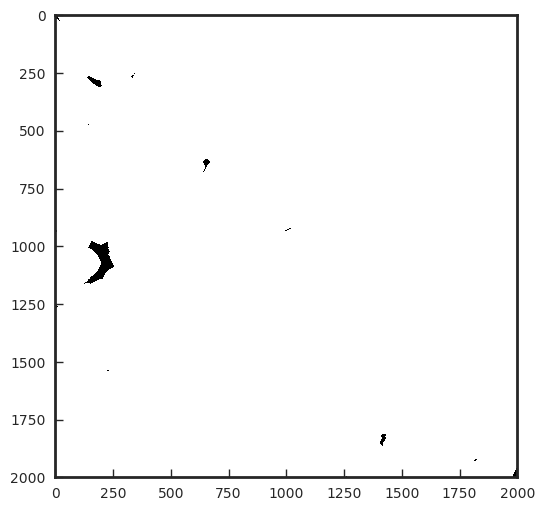

Height: 18
Zeros: 9555


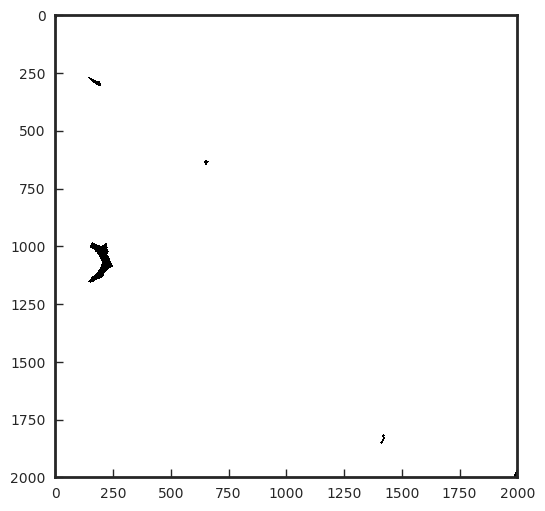

Height: 19
Zeros: 6372


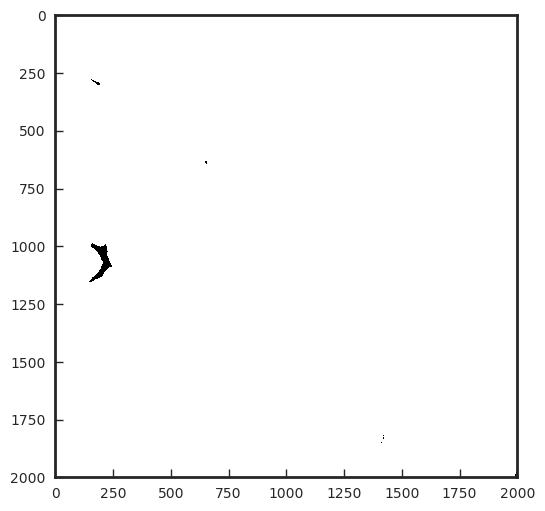

Height: 20
Zeros: 4077


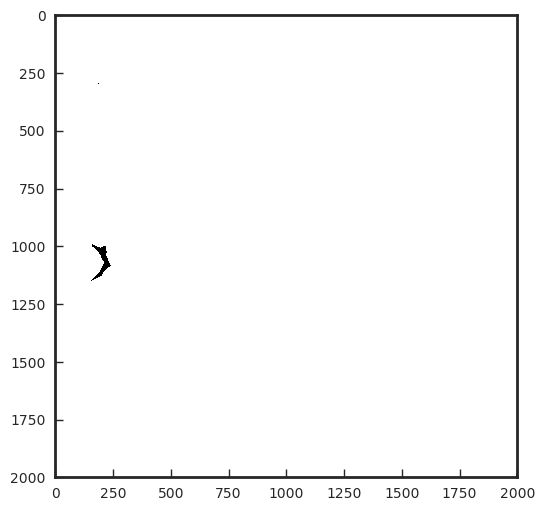

Height: 21
Zeros: 2385


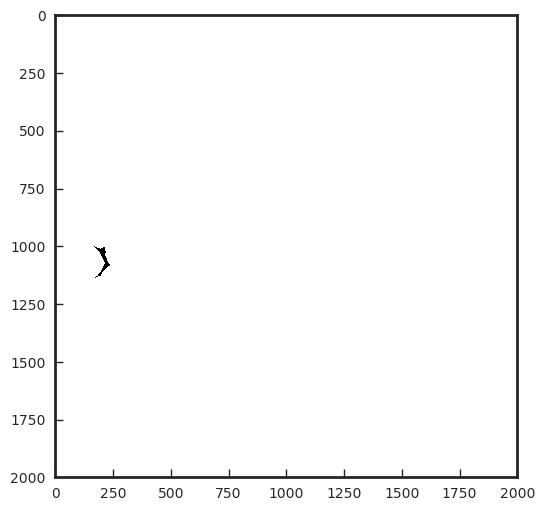

Height: 22
Zeros: 1067


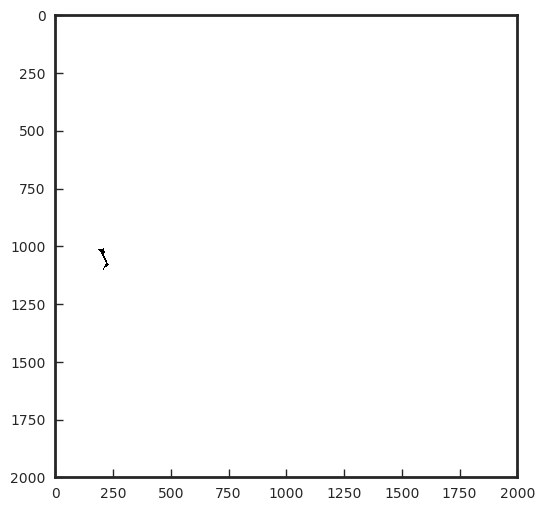

Height: 23
Zeros: 254


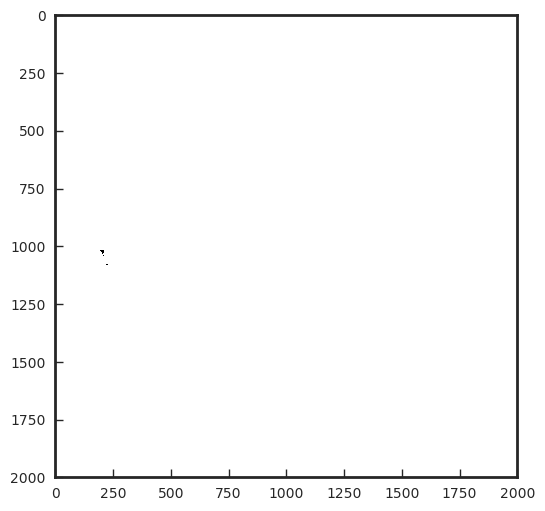

Height: 24
Zeros: 34


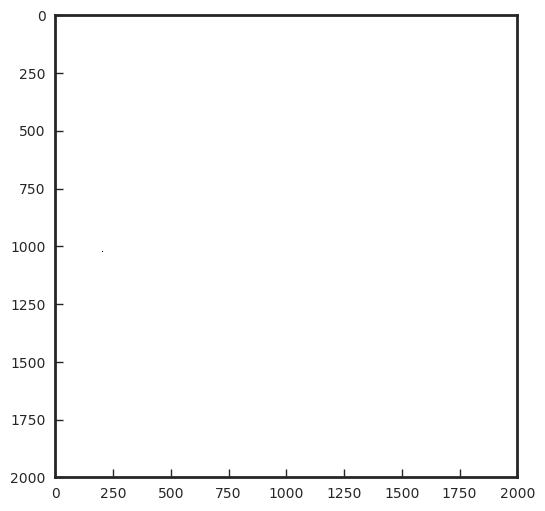

Height: 25
Zeros: 0


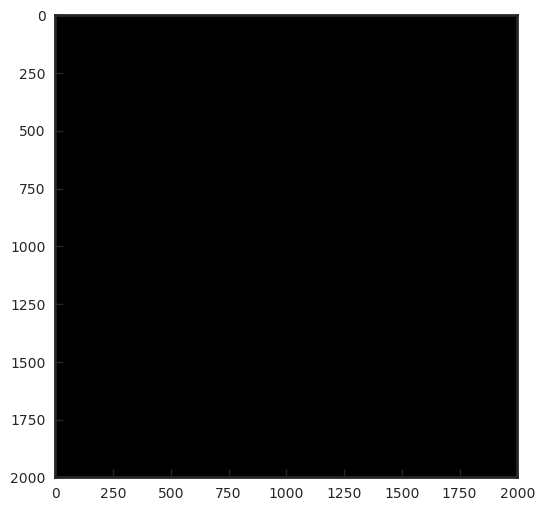

In [45]:
simplices = []
dims = []
heights = []

curr_height = 0

num_zeros = np.count_nonzero(data==0)

print("Height:", curr_height)
print("Zeros:", num_zeros)

simplices.extend(np.nonzero(data.flatten())[0])
dims.extend(np.full_like(simplices, 2))
heights.extend(np.full_like(simplices, curr_height))

print(len(simplices))

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(data, cmap=plt.cm.gray)
# ax.axis('off')
plt.show()


while num_zeros > 0:
    
    curr_height += 1

    selem = morph.disk(4)
    dilated = morph.dilation(data, selem)
        
    new_nonzeros = np.nonzero((dilated - data).flatten())[0]
                
    num_zeros -= len(new_nonzeros)
    
    print("Height:", curr_height)
    print("Zeros:", num_zeros)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(dilated, cmap=plt.cm.gray)
#     ax.axis('off')
    plt.show()
        
    simplices.extend(new_nonzeros)
    dims.extend(np.full_like(new_nonzeros, 2))
    heights.extend(np.full_like(new_nonzeros, curr_height))
        
    data = dilated
    
    if curr_height >= 32:
        break


In [ ]:
(ipairs, pheight, persist, sim_to_pindex) = homology.compute_persistence_pairs(simplices, dims, heights, boundaries)

print(ipairs)
print(persist)

In [ ]:
birth = [[] for i in range(3)]
death = [[] for i in range(3)]
mult = [[] for i in range(3)]
for d in range(3):
    for (i, j) in list(ipairs[d].keys()):
        birth[d].append(pheight[i])
        death[d].append(pheight[j])
        mult[d].append(ipairs[d][(i, j)])

pbirth = [[] for i in range(3)]
for d in range(3):
    for i in (persist[d].keys()):
        pbirth[d].append(pheight[i])

# print(birth)
# print(death)

for d in range(3):
    
    fig = plt.figure(figsize=(12,4))
    
    ax1 = fig.add_subplot(1,1,1)

    ax1.scatter(birth[d], death[d], c=mult[d], marker='o', cmap='Blues', edgecolors='k', linewidths=1.0, s=100)
    
    ax1.scatter(pbirth[d], pbirth[d], marker='s', color='r')

    ax1.plot(np.linspace(0, curr_height, 100), np.linspace(0, curr_height, 100), 'k--')
    
    ax1.set_title(r"$d={}$".format(d))

#     ax1.set_xlim(1e1, 1e-7)
#     ax1.set_ylim(1e1, 1e-7)

    
#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
    
    ax1.set_xlabel(r"birth")
    ax1.set_ylabel(r"death")
        
    plt.tight_layout()

    plt.show()